In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from scipy import stats
import warnings
import os

warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [2]:
print("\n" + "="*70)
print("📥 LOADING DATASETS")
print("="*70)

# Load Dataset 1: Economic Indicators
dataset1_path = "../../data/preprocessed/economic_indicators_dataset.csv"
dataset1 = pd.read_csv(dataset1_path)
print(f"\n📊 Dataset 1: Economic Indicators")
print(f"   Shape: {dataset1.shape}")
print(f"   Countries: {dataset1.shape[0]}")
print(f"   Indicators: {dataset1.shape[1] - 1}")
print("\n✅ dataset loaded successfully")


📥 LOADING DATASETS

📊 Dataset 1: Economic Indicators
   Shape: (266, 84)
   Countries: 266
   Indicators: 83

✅ dataset loaded successfully


In [4]:
print("\n" + "="*70)
print("🔍 INITIAL DATA EXPLORATION")
print("="*70)

print("\n📊 DATASET 1: Economic Indicators")
print("-" * 70)
print("\nFirst few rows:")
display(dataset1.head())

print("\nData types:")
print(dataset1.dtypes.value_counts())

print("\nBasic statistics:")
display(dataset1.describe())


🔍 INITIAL DATA EXPLORATION

📊 DATASET 1: Economic Indicators
----------------------------------------------------------------------

First few rows:


,Country,"Gross national income, Atlas method_$ billions_2024","Gross national income per capita, Atlas method_$_2024",Purchasing power parity gross national income_$ billions_2024,Purchasing power parity gross national income_per capita_$_2024,Gross domestic product_% growth_2024,Gross domestic product_per capita_% growth_2024,GDP_Growth_Gross domestic product_average annual real growth (%)_2010-2020,GDP_Growth_Gross domestic product_average annual real growth (%)_2020-2024,GDP_Growth_Agriculture_average annual real growth (%)_2010-2020,GDP_Growth_Agriculture_average annual real growth (%)_2020-2024,GDP_Growth_Industry_average annual real growth (%)_2010-2020,GDP_Growth_Industry_average annual real growth (%)_2020-2024,GDP_Growth_Manufacturing_average annual real growth (%)_2010-2020,GDP_Growth_Manufacturing_average annual real growth (%)_2020-2024,GDP_Growth_Services_average annual real growth (%)_2010-2020,GDP_Growth_Services_average annual real growth (%)_2020-2024,Structure_Value_Gross domestic product_$ billions_2015,Structure_Value_Gross domestic product_$ billions_2024,Structure_Value_Agriculture_% of GDP_2015,Structure_Value_Agriculture_% of GDP_2024,Structure_Value_Industry_% of GDP_2015,Structure_Value_Industry_% of GDP_2024,Structure_Value_Manufacturing_% of GDP_2015,Structure_Value_Manufacturing_% of GDP_2024,Structure_Value_Services_% of GDP_2015,Structure_Value_Services_% of GDP_2024,Structure_Manufacturing_Manufacturing value added_$ billions_2010,Structure_Manufacturing_Manufacturing value added_$ billions_2022,"Structure_Manufacturing_Food, beverages and tobacco_%of total_2010","Structure_Manufacturing_Food, beverages and tobacco_%of total_2022",Structure_Manufacturing_Textiles and clothing_%of total_2010,Structure_Manufacturing_Textiles and clothing_%of total_2022,Structure_Manufacturing_Machinery and transport equipment_%of total_2010,Structure_Manufacturing_Machinery and transport equipment_%of total_2022,Structure_Manufacturing_Chemicals_%of total_2010,Structure_Manufacturing_Chemicals_%of total_2022,Structure_Manufacturing_Other manufacturing_%of total_2010,Structure_Manufacturing_Other manufacturing_%of total_2022,Structure_Exports_Merchandise exports_$ millions_2015,Structure_Exports_Merchandise exports_$ millions_2023,Structure_Exports_Food_% of total_2015,Structure_Exports_Food_% of total_2023,Structure_Exports_Agricultural raw materials_% of total_2015,Structure_Exports_Agricultural raw materials_% of total_2023,Structure_Exports_Fuels_% of total_2015,Structure_Exports_Fuels_% of total_2023,Structure_Exports_Ores and metals_% of total_2015,Structure_Exports_Ores and metals_% of total_2023,Structure_Exports_Manufactures_% of total_2015,Structure_Exports_Manufactures_% of total_2023,"Unemployment_Unemployment, male (% of male labor force) (modeled ILO estimate)_2015","Unemployment_Unemployment, male (% of male labor force) (modeled ILO estimate)_2021","Unemployment_Unemployment, female (% of female labor force) (modeled ILO estimate)_2015","Unemployment_Unemployment, female (% of female labor force) (modeled ILO estimate)_2021","Unemployment_Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)_2015","Unemployment_Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)_2021","Unemployment_Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)_2015","Unemployment_Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)_2021",Unemployment_Unemployment with basic education (% of total labor force with basic education)_2015-21,Unemployment_Unemployment with intermediate education (% of total labor force with intermediate education)_2015-21,Unemployment_Unemployment with advanced education (% of total labor force with advanced education)_2015-21,Poverty_IntlLine1_International poverty lines_Population below $3.00 a day_%,Poverty_IntlLine1_International poverty lines_Population below $3.00 a


Data types:
float64    83
object      1
Name: count, dtype: int64

Basic statistics:


,"Gross national income, Atlas method_$ billions_2024","Gross national income per capita, Atlas method_$_2024",Purchasing power parity gross national income_$ billions_2024,Purchasing power parity gross national income_per capita_$_2024,Gross domestic product_% growth_2024,Gross domestic product_per capita_% growth_2024,GDP_Growth_Gross domestic product_average annual real growth (%)_2010-2020,GDP_Growth_Gross domestic product_average annual real growth (%)_2020-2024,GDP_Growth_Agriculture_average annual real growth (%)_2010-2020,GDP_Growth_Agriculture_average annual real growth (%)_2020-2024,GDP_Growth_Industry_average annual real growth (%)_2010-2020,GDP_Growth_Industry_average annual real growth (%)_2020-2024,GDP_Growth_Manufacturing_average annual real growth (%)_2010-2020,GDP_Growth_Manufacturing_average annual real growth (%)_2020-2024,GDP_Growth_Services_average annual real growth (%)_2010-2020,GDP_Growth_Services_average annual real growth (%)_2020-2024,Structure_Value_Gross domestic product_$ billions_2015,Structure_Value_Gross domestic product_$ billions_2024,Structure_Value_Agriculture_% of GDP_2015,Structure_Value_Agriculture_% of GDP_2024,Structure_Value_Industry_% of GDP_2015,Structure_Value_Industry_% of GDP_2024,Structure_Value_Manufacturing_% of GDP_2015,Structure_Value_Manufacturing_% of GDP_2024,Structure_Value_Services_% of GDP_2015,Structure_Value_Services_% of GDP_2024,Structure_Manufacturing_Manufacturing value added_$ billions_2010,Structure_Manufacturing_Manufacturing value added_$ billions_2022,"Structure_Manufacturing_Food, beverages and tobacco_%of total_2010","Structure_Manufacturing_Food, beverages and tobacco_%of total_2022",Structure_Manufacturing_Textiles and clothing_%of total_2010,Structure_Manufacturing_Textiles and clothing_%of total_2022,Structure_Manufacturing_Machinery and transport equipment_%of total_2010,Structure_Manufacturing_Machinery and transport equipment_%of total_2022,Structure_Manufacturing_Chemicals_%of total_2010,Structure_Manufacturing_Chemicals_%of total_2022,Structure_Manufacturing_Other manufacturing_%of total_2010,Structure_Manufacturing_Other manufacturing_%of total_2022,Structure_Exports_Merchandise exports_$ millions_2015,Structure_Exports_Merchandise exports_$ millions_2023,Structure_Exports_Food_% of total_2015,Structure_Exports_Food_% of total_2023,Structure_Exports_Agricultural raw materials_% of total_2015,Structure_Exports_Agricultural raw materials_% of total_2023,Structure_Exports_Fuels_% of total_2015,Structure_Exports_Fuels_% of total_2023,Structure_Exports_Ores and metals_% of total_2015,Structure_Exports_Ores and metals_% of total_2023,Structure_Exports_Manufactures_% of total_2015,Structure_Exports_Manufactures_% of total_2023,"Unemployment_Unemployment, male (% of male labor force) (modeled ILO estimate)_2015","Unemployment_Unemployment, male (% of male labor force) (modeled ILO estimate)_2021","Unemployment_Unemployment, female (% of female labor force) (modeled ILO estimate)_2015","Unemployment_Unemployment, female (% of female labor force) (modeled ILO estimate)_2021","Unemployment_Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)_2015","Unemployment_Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)_2021","Unemployment_Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)_2015","Unemployment_Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)_2021",Unemployment_Unemployment with basic education (% of total labor force with basic education)_2015-21,Unemployment_Unemployment with intermediate education (% of total labor force with intermediate education)_2015-21,Unemployment_Unemployment with advanced education (% of total labor force with advanced education)_2015-21,Poverty_IntlLine1_International poverty lines_Population below $3.00 a day_%,Poverty_IntlLine1_International poverty lines_Population below $3.00 a day_%.1

In [ ]:
print("\n" + "="*70)
print("🔍 MISSING VALUES ANALYSIS - DATASET 1")
print("="*70)

# Calculate missing values
missing_data1 = pd.DataFrame({
    'Column': dataset1.columns,
    'Missing_Count': dataset1.isnull().sum(),
    'Missing_Percentage': (dataset1.isnull().sum() / len(dataset1) * 100).round(2)
})

# Sort by missing percentage
missing_data1 = missing_data1.sort_values('Missing_Percentage', ascending=False)

# Display columns with missing values
missing_with_values1 = missing_data1[missing_data1['Missing_Count'] > 0]

print(f"\n📊 Total columns: {len(dataset1.columns)}")
print(f"📊 Columns with missing values: {len(missing_with_values1)}")
print(f"📊 Columns without missing values: {len(dataset1.columns) - len(missing_with_values1)}")

if len(missing_with_values1) > 0:
    print(f"\n⚠️ Columns with missing values (showing top 20):")
    display(missing_with_values1.head(20))
else:
    print("\n✅ No missing values found!")

# Overall missing percentage
total_cells1 = dataset1.shape[0] * dataset1.shape[1]
total_missing1 = dataset1.isnull().sum().sum()
overall_missing_pct1 = (total_missing1 / total_cells1 * 100).round(2)

print(f"\n📊 Overall missing data percentage: {overall_missing_pct1}%")
print(f"   Total cells: {total_cells1:,}")
print(f"   Missing cells: {total_missing1:,}")


🔍 MISSING VALUES ANALYSIS - DATASET 1

📊 Total columns: 84
📊 Columns with missing values: 84
📊 Columns without missing values: 0

⚠️ Columns with missing values (showing top 20):


,Column,Missing_Count,Missing_Percentage
Poverty_IntlLine2_6,Poverty_IntlLine2_6,266,100.00
Poverty_IntlLine2_5,Poverty_IntlLine2_5,266,100.00
Poverty_IntlLine2_2,Poverty_IntlLine2_2,266,100.00
Poverty_IntlLine2_1,Poverty_IntlLine2_1,266,100.00
Poverty_IntlLine2_17,Poverty_IntlLine2_17,266,100.00
Poverty_IntlLine2_18,Poverty_IntlLine2_18,266,100.00
Poverty_IntlLine2_16,Poverty_IntlLine2_16,266,100.00
Poverty_IntlLine2_15,Poverty_IntlLine2_15,266,100.00
Poverty_IntlLine2_14,Poverty_IntlLine2_14,266,100.00
Poverty_IntlLine2_13,Poverty_IntlLine2_13,266,100.00



📊 Overall missing data percentage: 45.51%
   Total cells: 22,344
   Missing cells: 10,168



📊 Creating missing values visualization for Dataset 1...
✅ Saved: ../../outputs/missing_values_dataset1.png


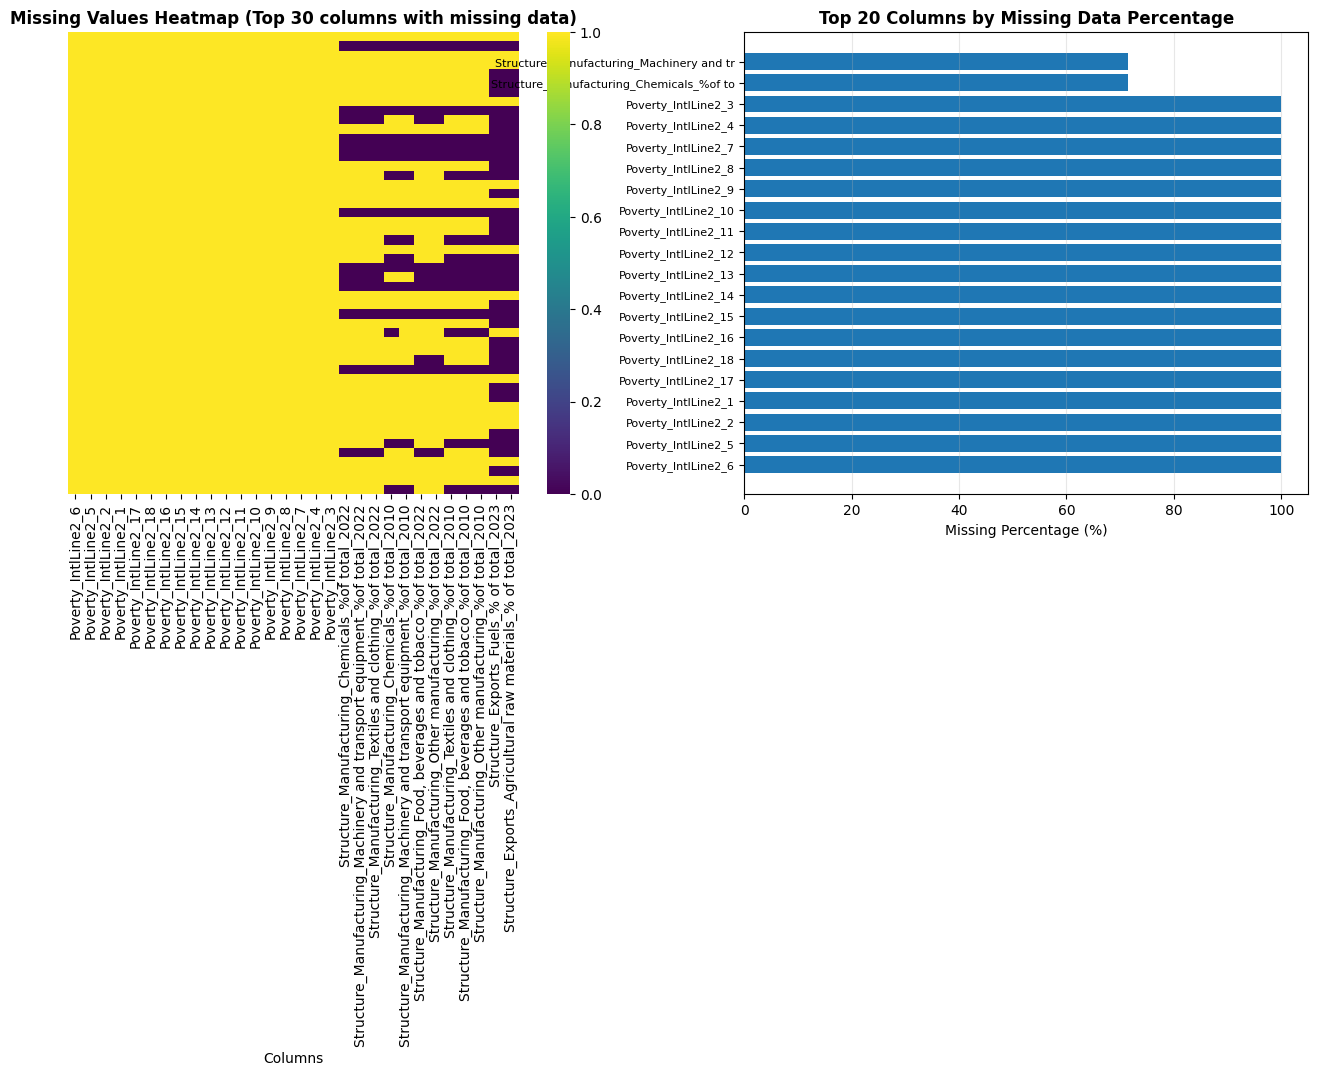

In [6]:
print("\n📊 Creating missing values visualization for Dataset 1...")

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Missing values heatmap (sample of columns)
ax1 = axes[0]
# Select columns with most missing values (top 30)
top_missing_cols = missing_with_values1.head(30)['Column'].tolist()
if len(top_missing_cols) > 0:
    sample_data = dataset1[top_missing_cols].head(50)
    sns.heatmap(sample_data.isnull(), cbar=True, cmap='viridis', 
                yticklabels=False, ax=ax1)
    ax1.set_title('Missing Values Heatmap (Top 30 columns with missing data)', 
                  fontsize=12, fontweight='bold')
    ax1.set_xlabel('Columns')
else:
    ax1.text(0.5, 0.5, 'No Missing Values', 
             ha='center', va='center', fontsize=16)
    ax1.set_title('Missing Values Heatmap')

# Plot 2: Bar chart of missing percentages
ax2 = axes[1]
if len(missing_with_values1) > 0:
    top_20_missing = missing_with_values1.head(20)
    ax2.barh(range(len(top_20_missing)), top_20_missing['Missing_Percentage'])
    ax2.set_yticks(range(len(top_20_missing)))
    ax2.set_yticklabels([col[:40] for col in top_20_missing['Column']], fontsize=8)
    ax2.set_xlabel('Missing Percentage (%)')
    ax2.set_title('Top 20 Columns by Missing Data Percentage', 
                  fontsize=12, fontweight='bold')
    ax2.grid(axis='x', alpha=0.3)
else:
    ax2.text(0.5, 0.5, 'No Missing Values', 
             ha='center', va='center', fontsize=16)
    ax2.set_title('Missing Data by Column')

plt.tight_layout()
plt.savefig('../../outputs/clean_economic_indicators_missing_values.png', dpi=300, bbox_inches='tight')
print("✅ Saved: ../../outputs/missing_values_dataset1.png")
plt.show()

In [7]:
print("\n" + "="*70)
print("🔧 HANDLING MISSING VALUES - DATASET 1")
print("="*70)

# Create a copy for cleaning
dataset1_cleaned = dataset1.copy()

print("\n📋 Strategy:")
print("   1. Remove columns with >80% missing data")
print("   2. Remove rows where Country is missing")
print("   3. Impute remaining missing values with median")

# Step 1: Remove columns with >80% missing data
missing_threshold = 80
cols_to_drop = missing_data1[missing_data1['Missing_Percentage'] > missing_threshold]['Column'].tolist()

if 'Country' in cols_to_drop:
    cols_to_drop.remove('Country')

print(f"\n🗑️ Removing {len(cols_to_drop)} columns with >{missing_threshold}% missing data:")
if len(cols_to_drop) > 0:
    for col in cols_to_drop[:10]:  # Show first 10
        pct = missing_data1[missing_data1['Column'] == col]['Missing_Percentage'].values[0]
        print(f"   • {col[:60]}... ({pct}% missing)")
    if len(cols_to_drop) > 10:
        print(f"   ... and {len(cols_to_drop) - 10} more columns")
    
    dataset1_cleaned = dataset1_cleaned.drop(columns=cols_to_drop)
    print(f"   ✅ Dropped {len(cols_to_drop)} columns")
else:
    print("   ✅ No columns exceed threshold")

# Step 2: Remove rows with missing Country
before_rows = len(dataset1_cleaned)
dataset1_cleaned = dataset1_cleaned[dataset1_cleaned['Country'].notna()]
dataset1_cleaned = dataset1_cleaned[dataset1_cleaned['Country'] != 'nan']
after_rows = len(dataset1_cleaned)
removed_rows = before_rows - after_rows

if removed_rows > 0:
    print(f"\n🗑️ Removed {removed_rows} rows with missing Country")
else:
    print(f"\n✅ No rows with missing Country")

# Step 3: Impute remaining missing values with median
print(f"\n🔧 Imputing remaining missing values with median...")

# Separate Country column
country_col = dataset1_cleaned['Country'].copy()
numeric_cols = dataset1_cleaned.select_dtypes(include=[np.number]).columns

# Impute numeric columns
imputer = SimpleImputer(strategy='median')
dataset1_cleaned[numeric_cols] = imputer.fit_transform(dataset1_cleaned[numeric_cols])

print(f"   ✅ Imputed missing values in {len(numeric_cols)} numeric columns")

# Check remaining missing values
remaining_missing = dataset1_cleaned.isnull().sum().sum()
print(f"\n📊 Remaining missing values: {remaining_missing}")

print(f"\n✅ Dataset 1 cleaning completed!")
print(f"   Original shape: {dataset1.shape}")
print(f"   Cleaned shape: {dataset1_cleaned.shape}")
print(f"   Rows removed: {dataset1.shape[0] - dataset1_cleaned.shape[0]}")
print(f"   Columns removed: {dataset1.shape[1] - dataset1_cleaned.shape[1]}")


🔧 HANDLING MISSING VALUES - DATASET 1

📋 Strategy:
   1. Remove columns with >80% missing data
   2. Remove rows where Country is missing
   3. Impute remaining missing values with median

🗑️ Removing 18 columns with >80% missing data:
   • Poverty_IntlLine2_6... (100.0% missing)
   • Poverty_IntlLine2_5... (100.0% missing)
   • Poverty_IntlLine2_2... (100.0% missing)
   • Poverty_IntlLine2_1... (100.0% missing)
   • Poverty_IntlLine2_17... (100.0% missing)
   • Poverty_IntlLine2_18... (100.0% missing)
   • Poverty_IntlLine2_16... (100.0% missing)
   • Poverty_IntlLine2_15... (100.0% missing)
   • Poverty_IntlLine2_14... (100.0% missing)
   • Poverty_IntlLine2_13... (100.0% missing)
   ... and 8 more columns
   ✅ Dropped 18 columns

🗑️ Removed 1 rows with missing Country

🔧 Imputing remaining missing values with median...
   ✅ Imputed missing values in 65 numeric columns

📊 Remaining missing values: 0

✅ Dataset 1 cleaning completed!
   Original shape: (266, 84)
   Cleaned shape: (265

In [12]:
print("\n" + "="*70)
print("📏 STANDARDIZATION & NORMALIZATION - DATASET 1")
print("="*70)

# Create copies for different scaling methods
dataset1_standardized = dataset1_cleaned.copy()
dataset1_normalized = dataset1_cleaned.copy()

# Separate Country column
country_col_d1 = dataset1_cleaned['Country'].copy()
numeric_cols_d1 = dataset1_cleaned.select_dtypes(include=[np.number]).columns

print(f"\n📊 Numeric columns to scale: {len(numeric_cols_d1)}")

# Method 1: Standardization (Z-score normalization)
print(f"\n🔧 Method 1: Standardization (Z-score)")
print(f"   Formula: z = (x - μ) / σ")
print(f"   Result: Mean = 0, Std = 1")

scaler_standard = StandardScaler()
dataset1_standardized[numeric_cols_d1] = scaler_standard.fit_transform(
    dataset1_cleaned[numeric_cols_d1]
)

print(f"   ✅ Standardization completed")
print(f"   Sample stats after standardization:")
print(f"      Mean: {dataset1_standardized[numeric_cols_d1].mean().mean():.4f}")
print(f"      Std:  {dataset1_standardized[numeric_cols_d1].std().mean():.4f}")

# Method 2: Min-Max Normalization
print(f"\n🔧 Method 2: Min-Max Normalization")
print(f"   Formula: x_scaled = (x - min) / (max - min)")
print(f"   Result: Values between 0 and 1")

scaler_minmax = MinMaxScaler()
dataset1_normalized[numeric_cols_d1] = scaler_minmax.fit_transform(
    dataset1_cleaned[numeric_cols_d1]
)

print(f"   ✅ Normalization completed")
print(f"   Sample stats after normalization:")
print(f"      Min: {dataset1_normalized[numeric_cols_d1].min().min():.4f}")
print(f"      Max: {dataset1_normalized[numeric_cols_d1].max().max():.4f}")

print(f"\n✅ clean economic indicators scaling completed!")


📏 STANDARDIZATION & NORMALIZATION - DATASET 1

📊 Numeric columns to scale: 65

🔧 Method 1: Standardization (Z-score)
   Formula: z = (x - μ) / σ
   Result: Mean = 0, Std = 1
   ✅ Standardization completed
   Sample stats after standardization:
      Mean: 0.0000
      Std:  1.0019

🔧 Method 2: Min-Max Normalization
   Formula: x_scaled = (x - min) / (max - min)
   Result: Values between 0 and 1
   ✅ Normalization completed
   Sample stats after normalization:
      Min: 0.0000
      Max: 1.0000

✅ clean economic indicators scaling completed!


In [13]:
print("\n" + "="*70)
print("💾 SAVING CLEANED DATASETS")
print("="*70)

# Create output directory if it doesn't exist
output_dir = "../../data/cleaned"
os.makedirs(output_dir, exist_ok=True)

# Save Dataset 1 versions
print("\n📊 Saving clean economic indicators versions...")

# 1. Cleaned (no scaling)
file1_cleaned = os.path.join(output_dir, "clean_economic_indicators_cleaned.csv")
dataset1_cleaned.to_csv(file1_cleaned, index=False)
print(f"   ✅ Saved: {file1_cleaned}")
print(f"      Shape: {dataset1_cleaned.shape}")

# 2. Standardized (Z-score)
file1_standardized = os.path.join(output_dir, "economic_indicators_standardized.csv")
dataset1_standardized.to_csv(file1_standardized, index=False)
print(f"   ✅ Saved: {file1_standardized}")
print(f"      Shape: {dataset1_standardized.shape}")

# 3. Normalized (Min-Max)
file1_normalized = os.path.join(output_dir, "economic_indicators_normalized.csv")
dataset1_normalized.to_csv(file1_normalized, index=False)
print(f"   ✅ Saved: {file1_normalized}")
print(f"      Shape: {dataset1_normalized.shape}")


💾 SAVING CLEANED DATASETS

📊 Saving clean economic indicators versions...
   ✅ Saved: ../../data/cleaned/clean_economic_indicators_cleaned.csv
      Shape: (265, 66)
   ✅ Saved: ../../data/cleaned/economic_indicators_standardized.csv
      Shape: (265, 66)
   ✅ Saved: ../../data/cleaned/economic_indicators_normalized.csv
      Shape: (265, 66)
